In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('salaries.csv')

In [9]:
df.rename(columns={'salary_more_then_100k':'salary'},inplace=True)

In [12]:
inputs=df[['company','job','degree']]
target=df['salary']

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
l_company=LabelEncoder()
l_job=LabelEncoder()
l_degree=LabelEncoder()


In [20]:
inputs['l_company']=l_company.fit_transform(inputs['company'])
inputs['l_job']=l_job.fit_transform(inputs['job'])
inputs['l_degree']=l_degree.fit_transform(inputs['degree'])

In [21]:
inputs

,company,job,degree,l_company,l_job,l_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [25]:
new=inputs.drop(['company','job','degree'],axis='columns')

In [26]:
new

,l_company,l_job,l_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [27]:
from sklearn import tree

In [28]:
model=tree.DecisionTreeClassifier()

In [38]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 16 entries, 0 to 15
Series name: salary
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 260.0 bytes


In [44]:
model.fit(new[['l_company','l_job','l_degree']],target)

DecisionTreeClassifier()

In [45]:
model.score(new,target)

1.0

In [49]:
ne=np.array([[2,0,1]])
m=model.predict(ne)

C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
p=int(m[0])

In [52]:
p

1

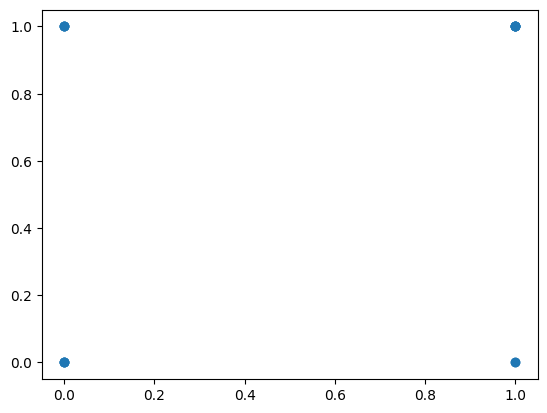

In [54]:
plt.scatter(new['l_degree'],target)

In [60]:
d=new[new.duplicated()]

In [57]:
d

,l_company,l_job,l_degree
